# Capstone 1: Airbnb Price Analysis # 
## Cleaning and Pre-Processing ##

**Importing necessary libraries and reading in listing data**

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('listings.csv', index_col='id', low_memory=False)
pd.set_option('display.max_columns', len(df.columns))

In [4]:
df.sort_index(inplace=True)
df.head(3)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2265,https://www.airbnb.com/rooms/2265,20200219033646,2020-02-19,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,7 months ago,t,0,0,0,0,2020-02-19,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
5245,https://www.airbnb.com/rooms/5245,20200219033646,2020-02-19,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/us

I noticed that there's some columns that use 't' or 'f' for True and False. I will convert those to 1 and 0 respectively to become more Pythonic.

In [5]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

Saving the latitude and longitude coordinate columns into a new df to use for later.

In [6]:
coordinates = df[['latitude','longitude']]

In [7]:
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'has_availability', 'host_has_profile_pic', 'is_business_travel_ready','requires_license','zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
df = df.drop(drop_cols, axis=1)

In [8]:
print(df.shape)
print(df.dtypes.value_counts())

(11520, 52)
object     22
float64    16
int64      14
dtype: int64


The listings dataframe now contains 11,520 rows and 52 columns with mixed data types.

In [9]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['host_is_superhost' 'host_listings_count' 'host_identity_verified'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'square_feet' 'guests_included'
 'minimum_nights' 'maximum_nights' 'availability_30' 'availability_60'
 'availability_90' 'availability_365' 'number_of_reviews'
 'number_of_reviews_ltm' 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'instant_bookable' 'require_guest_profile_picture'
 'require_guest_phone_verification' 'reviews_per_month']


In [10]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['experiences_offered' 'host_since' 'host_response_time'
 'host_response_rate' 'host_acceptance_rate' 'city' 'property_type'
 'room_type' 'bed_type' 'amenities' 'price' 'weekly_price' 'monthly_price'
 'security_deposit' 'cleaning_fee' 'extra_people' 'calendar_updated'
 'first_review' 'last_review' 'license' 'jurisdiction_names'
 'cancellation_policy']


Missing Data Heatmap

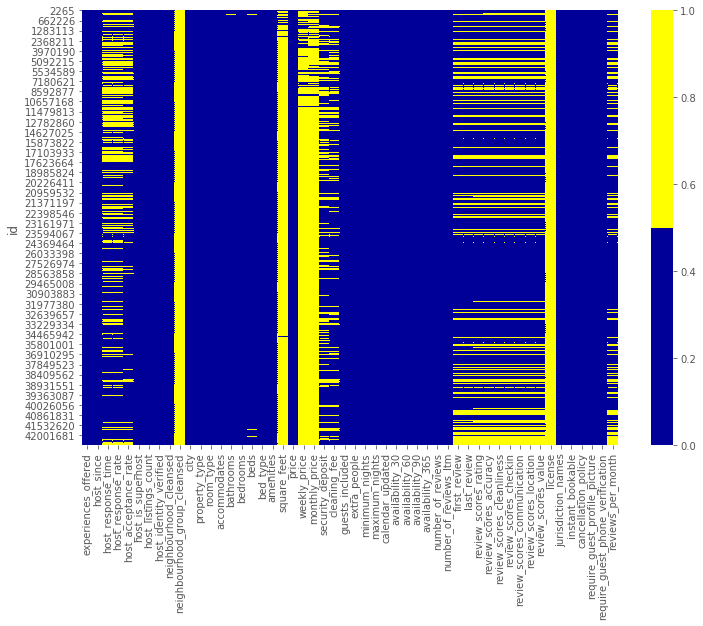

In [11]:
cols = df.columns[:] #
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

It's now clear that there are several columns that are completely empty of missing a large portion of data.

Listing percentages of missing data in each column

In [12]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

experiences_offered - 0.0%
host_since - 0.0%
host_response_time - 31.0%
host_response_rate - 31.0%
host_acceptance_rate - 23.0%
host_is_superhost - 0.0%
host_listings_count - 0.0%
host_identity_verified - 0.0%
neighbourhood_cleansed - 0.0%
neighbourhood_group_cleansed - 100.0%
city - 0.0%
property_type - 0.0%
room_type - 0.0%
accommodates - 0.0%
bathrooms - 0.0%
bedrooms - 0.0%
beds - 0.0%
bed_type - 0.0%
amenities - 0.0%
square_feet - 98.0%
price - 0.0%
weekly_price - 92.0%
monthly_price - 94.0%
security_deposit - 27.0%
cleaning_fee - 18.0%
guests_included - 0.0%
extra_people - 0.0%
minimum_nights - 0.0%
maximum_nights - 0.0%
calendar_updated - 0.0%
availability_30 - 0.0%
availability_60 - 0.0%
availability_90 - 0.0%
availability_365 - 0.0%
number_of_reviews - 0.0%
number_of_reviews_ltm - 0.0%
first_review - 21.0%
last_review - 21.0%
review_scores_rating - 22.0%
review_scores_accuracy - 22.0%
review_scores_cleanliness - 22.0%
review_scores_checkin - 22.0%
review_scores_communication -

In [13]:
drop_cols = ['neighbourhood_group_cleansed', 'square_feet','weekly_price', 'monthly_price', 'license', ]
df = df.drop(drop_cols, axis=1)

In [14]:
df.columns

Index(['experiences_offered', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       're

# Cleaning Individual Columns #

**Column Descriptions**

*Description of each column:*
- experiences_offered - slightly unclear as it does not appear to directly relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
- host_since - date that the host first joined Airbnb
- host_response_time - average amount of time the host takes to reply to messages
- host_response_rate - proportion of messages that the host replies to
- host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
- host_listings_count - how many listings the host has in total
- host_identity_verified - whether or not the host has been verified with id
- neighbourhood_cleansed - the London borough the property is in
- property_type - type of property, e.g. house or flat
- room_type - type of listing, e.g. entire home, private room or shared room
- accommodates - how many people the property accommodates
- bathrooms - number of bathrooms
- bedrooms - number of bedrooms
- beds - number of beds
- bed_type - type of bed, e.g. real bed or sofa-bed
- amenities - list of amenities
- price - nightly advertised price (the target variable)
- security_deposit - the amount required as a security deposit
- cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
- guests_included - the number of guests included in the booking fee
- extra_people - the price per additional guest above the guests_included price
- minimum_nights - the minimum length of stay
- maximum_nights - the maximum length of stay
- calendar_updated - when the host last updated the calendar
- availability_30 - how many nights are available to be booked in the next 30 days
- availability_60 - how many nights are available to be booked in the next 60 days
- availability_90 - how many nights are available to be booked in the next 90 days
- availability_365 - how many nights are available to be booked in the next 365 days
- number_of_reviews - the number of reviews left for the property
- number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
- first_review - the date of the first review
- last_review - the date of the most recent review
- review_scores_rating - guests can score properties overall from 1 to 5 stars
- review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
- review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
- review_scores_checkin - guests can score their check-in from 1 to 5 stars
- review_scores_communication - guests can score a host's communication from 1 to 5 stars
- review_scores_location - guests can score a property's location from 1 to 5 stars
- review_scores_value - guests can score a booking's value for money from 1 to 5 stars
- instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
- cancellation_policy - the type of cancellation policy, e.g. strict or moderate
- reviews_per_month - calculated field of the average number of reviews left by guest each month

**experiences_offered**

In [15]:
df.experiences_offered.value_counts(dropna=False)

none    11520
Name: experiences_offered, dtype: int64

In [16]:
df.drop('experiences_offered', axis=1, inplace=True)

**host_since**

In [17]:
df.host_since.value_counts(dropna=False)

2016-11-19    245
2018-10-08    144
2017-02-01     86
2017-01-03     85
2013-02-04     84
             ... 
2018-07-05      1
2018-06-04      1
2018-09-18      1
2013-07-21      1
2011-03-26      1
Name: host_since, Length: 2847, dtype: int64

This column uses the date that a host joined as a data point. I'm going to convert this column to an integer value that represents the number of days the host has been on Airbnb and store it in a new columns.

In [18]:
# Converting to datetime object
df['host_since'] = pd.to_datetime(df['host_since'])
# Calcuating the number of days a host has been active on Airbnb
# I used 2/19/2020 as the end date since that was the date this data was scraped
df['days_as_host'] = (dt(2020, 2, 19) - df.host_since).astype('timedelta64[D]')


**host_response_time**

In [19]:
# Function to get basic information on each column
def col_info(col):
    pct_missing = np.mean(df[col].isnull())
    percentage = 'Missing Data: {}%'.format(round(pct_missing*100))
    value_counts = df[col].value_counts(dropna=False)
    unique_vals = 'Number of Unique Values: {}'.format(df[col].nunique())
    data_type = '\nData Type: {}'.format(df[col].dtype)
    
    return print("Column Name", col, data_type, unique_vals, percentage, "\nValue Counts", value_counts, sep='\n')


In [20]:
col_info('host_response_time')

Column Name
host_response_time

Data Type: object
Number of Unique Values: 4
Missing Data: 31.0%

Value Counts
within an hour        6331
NaN                   3598
within a few hours     937
within a day           540
a few days or more     114
Name: host_response_time, dtype: int64


In [21]:
df.host_response_time.fillna('unknown', inplace=True)

**host_response_rate**

In [22]:
col_info('host_response_rate')

Column Name
host_response_rate

Data Type: object
Number of Unique Values: 46
Missing Data: 31.0%

Value Counts
100%    6566
NaN     3598
99%      345
90%      114
98%      109
0%        84
92%       76
97%       75
95%       71
80%       53
96%       50
67%       40
50%       37
89%       29
94%       28
88%       26
93%       25
86%       25
85%       24
83%       22
75%       19
33%       15
60%       13
91%       12
70%       11
87%       11
56%        5
71%        3
55%        3
57%        3
38%        3
20%        3
64%        3
82%        3
72%        2
25%        2
74%        2
17%        1
13%        1
44%        1
78%        1
10%        1
73%        1
63%        1
47%        1
14%        1
79%        1
Name: host_response_rate, dtype: int64


Since there are so many unqiue values here, I will create a smaller number of bins to represent the data.

In [23]:
# Converting response rate to numeric column
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

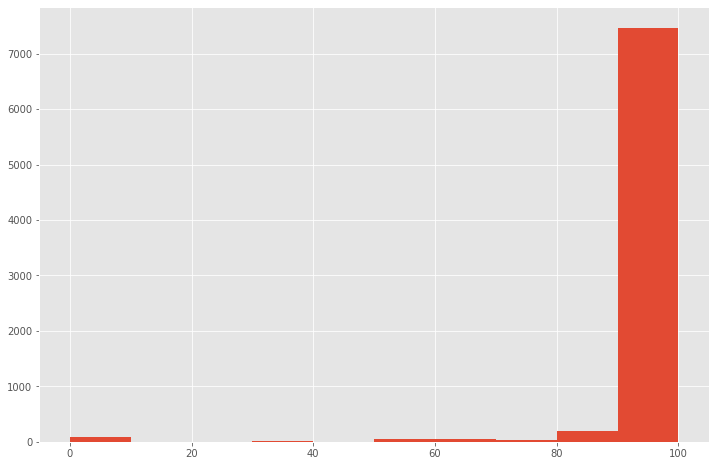

In [24]:
df.host_response_rate.hist(bins=10)

It's clear that most of the response rates lie within 90-100%.

In [25]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Calling function to see details of new column
col_info('host_response_rate')

Column Name
host_response_rate

Data Type: object
Number of Unique Values: 5
Missing Data: 0.0%

Value Counts
100%       6566
unknown    3598
90-99%      791
50-89%      415
0-49%       150
Name: host_response_rate, dtype: int64


**host_acceptance_rate**

In [26]:
col_info('host_acceptance_rate')

Column Name
host_acceptance_rate

Data Type: object
Number of Unique Values: 85
Missing Data: 23.0%

Value Counts
100%    3560
NaN     2671
99%     1116
98%      667
97%      302
        ... 
21%        1
24%        1
19%        1
39%        1
37%        1
Name: host_acceptance_rate, Length: 86, dtype: int64


Since there are so many unqiue values here, I will create 5 distinct ranges to bin the data.

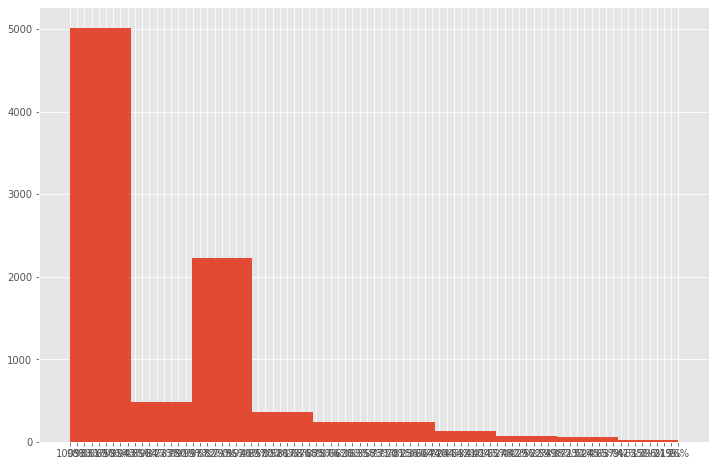

In [27]:
df.host_acceptance_rate.hist(bins=10)

In [28]:
# # Bin into four categories
# df.host_acceptance_rate = pd.cut(df.host_acceptance_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# # Converting to string
# df.host_acceptance_rate = df.host_acceptance_rate.astype('str')

# # Replace nulls with 'unknown'
# df.host_acceptance_rate.replace('nan', 'unknown', inplace=True)

# # Calling function to see details of new column
# col_info('host_acceptance_rate')

In [29]:
df.host_acceptance_rate.unique()

array(['100%', '98%', '93%', '83%', '61%', '69%', '50%', nan, '91%',
       '94%', '43%', '85%', '96%', '84%', '77%', '33%', '78%', '90%',
       '99%', '97%', '67%', '82%', '79%', '0%', '95%', '92%', '46%',
       '89%', '57%', '80%', '52%', '86%', '17%', '68%', '76%', '88%',
       '75%', '87%', '66%', '62%', '30%', '63%', '35%', '58%', '73%',
       '71%', '70%', '81%', '25%', '36%', '60%', '64%', '74%', '20%',
       '44%', '54%', '32%', '41%', '40%', '14%', '55%', '27%', '48%',
       '42%', '29%', '56%', '22%', '59%', '49%', '38%', '72%', '13%',
       '51%', '24%', '45%', '65%', '37%', '9%', '47%', '53%', '15%',
       '39%', '6%', '21%', '19%', '26%'], dtype=object)

**host_is_superhost**

In [30]:
col_info('host_is_superhost')

Column Name
host_is_superhost

Data Type: float64
Number of Unique Values: 2
Missing Data: 0.0%

Value Counts
0.0    7663
1.0    3855
NaN       2
Name: host_is_superhost, dtype: int64


**host_listings_count**

In [31]:
col_info('host_listings_count')

Column Name
host_listings_count

Data Type: float64
Number of Unique Values: 84
Missing Data: 0.0%

Value Counts
1.0      5202
2.0      1559
0.0       877
3.0       717
4.0       405
         ... 
232.0       1
129.0       1
18.0        1
219.0       1
92.0        1
Name: host_listings_count, Length: 85, dtype: int64


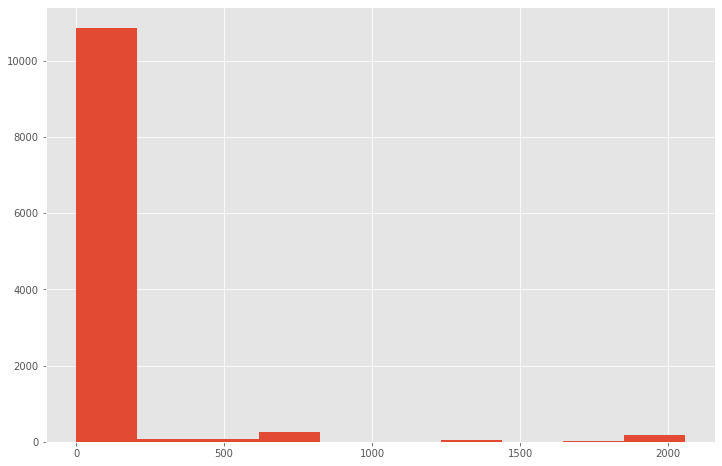

In [32]:
df.host_listings_count.hist()

In [33]:
df.host_listings_count = pd.qcut(df.host_listings_count, q=10, duplicates='drop', labels=['1','1-2','2-3','3-7','7-58','58-2056'])

In [34]:
col_info('host_listings_count')

Column Name
host_listings_count

Data Type: category
Number of Unique Values: 6
Missing Data: 0.0%

Value Counts
1          6079
1-2        1559
58-2056    1133
7-58       1112
3-7         918
2-3         717
NaN           2
Name: host_listings_count, dtype: int64


In [35]:
df[df.host_listings_count.isnull()]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,days_as_host
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4356661,NaT,unknown,unknown,NaN,NaN,NaN,NaN,78704,Austin,Apartment,Entire home/apt,2,1.0,1.0,1.0,Airbed,"{""Air conditioning"",""Wheelchair accessible"",Po...",$75.00,NaN,NaN,1,$0.00,1,1125,53 months ago,0,0,0,0,1,0,2015-08-13,2015-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""Texas State""}",0,strict_14_with_grace_period,0,0,0.02,NaN
8214182,NaT,unknown,unknown,NaN,NaN,NaN,NaN,78741,Austin,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$26.00,NaN,NaN,1,$0.00,1,5,51 months ago,0,0,0,0,4,0,2015-09-07,2015-09-24,93.0,9.0,9.0,10.0,10.0,10.0,10.0,"{""Texas State""}",0,flexible,0,0,0.07,NaN


**host_identity_verified**

In [36]:
col_info('host_identity_verified')

Column Name
host_identity_verified

Data Type: float64
Number of Unique Values: 2
Missing Data: 0.0%

Value Counts
0.0    6056
1.0    5462
NaN       2
Name: host_identity_verified, dtype: int64


It looks like there are slightly more hosts with unverified accounts compared to hosts with verified accounts

**neighbourhood_cleansed**

In [37]:
col_info('neighbourhood_cleansed')

Column Name
neighbourhood_cleansed

Data Type: int64
Number of Unique Values: 44
Missing Data: 0.0%

Value Counts
78704    2214
78702    1506
78741     785
78701     719
78705     651
78703     620
78745     535
78751     484
78723     340
78746     284
78757     242
78758     233
78721     224
78734     222
78722     218
78744     188
78748     169
78756     136
78731     135
78759     127
78749     127
78752     119
78753     104
78729     104
78737      99
78754      96
78727      90
78724      80
78733      75
78728      70
78736      63
78717      62
78725      60
78735      54
78750      50
78738      48
78732      45
78747      45
78730      40
78739      33
78726      13
78742       6
78712       3
78719       2
Name: neighbourhood_cleansed, dtype: int64


It appears that there are no missing values for this column, which is good.

**city**

In [38]:
col_info('city')

Column Name
city

Data Type: object
Number of Unique Values: 24
Missing Data: 0.0%

Value Counts
Austin                    11369
Lakeway                      66
West Lake Hills              26
Sunset Valley                10
Pflugerville                  8
Bee Cave                      6
The Hills                     6
Austin                        4
Dripping Springs              3
NaN                           2
Spicewood                     2
Lake Travis                   2
Manchaca                      2
AUSTIN                        2
Rollingwood                   2
Bouldin, Austin               1
Driftwood                     1
Westlake Hills, Austin        1
Cedar Park                    1
point venture                 1
Round Rock                    1
Downtown Austin               1
Anderson Mill                 1
Travis County                 1
austin                        1
Name: city, dtype: int64


There appears to be slight variations in how Austin, TX is entered. I will group everything into Austin and drop the outlying cities.

In [39]:
df.city = df.city.str.upper()

In [40]:
col_info('city')

Column Name
city

Data Type: object
Number of Unique Values: 22
Missing Data: 0.0%

Value Counts
AUSTIN                    11372
LAKEWAY                      66
WEST LAKE HILLS              26
SUNSET VALLEY                10
PFLUGERVILLE                  8
THE HILLS                     6
BEE CAVE                      6
AUSTIN                        4
DRIPPING SPRINGS              3
ROLLINGWOOD                   2
SPICEWOOD                     2
LAKE TRAVIS                   2
NaN                           2
MANCHACA                      2
CEDAR PARK                    1
POINT VENTURE                 1
BOULDIN, AUSTIN               1
TRAVIS COUNTY                 1
DRIFTWOOD                     1
WESTLAKE HILLS, AUSTIN        1
ROUND ROCK                    1
ANDERSON MILL                 1
DOWNTOWN AUSTIN               1
Name: city, dtype: int64


In [41]:
df.city.unique()

array(['AUSTIN', nan, 'WEST LAKE HILLS', 'SUNSET VALLEY', 'LAKEWAY',
       'ROLLINGWOOD', 'THE HILLS', 'MANCHACA', 'BEE CAVE',
       'ANDERSON MILL', 'DRIPPING SPRINGS', 'AUSTIN ', 'SPICEWOOD',
       'BOULDIN, AUSTIN', 'ROUND ROCK', 'WESTLAKE HILLS, AUSTIN',
       'DRIFTWOOD', 'LAKE TRAVIS', 'DOWNTOWN AUSTIN', 'PFLUGERVILLE',
       'CEDAR PARK', 'TRAVIS COUNTY', 'POINT VENTURE'], dtype=object)

In [42]:
mapped_cols_keep = {'AUSTIN':'AUSTIN', 'AUSTIN ':'AUSTIN', 'DOWNTOWN AUSTIN':'AUSTIN'}
df.city = df.city.map(mapped_cols_keep)

In [43]:
df.city.dropna(inplace=True)

**property_type**

In [44]:
col_info('property_type')

Column Name
property_type

Data Type: object
Number of Unique Values: 35
Missing Data: 0.0%

Value Counts
House                 5069
Apartment             3051
Condominium           1057
Guesthouse             522
Townhouse              418
Bungalow               298
Guest suite            266
Serviced apartment     169
Loft                   131
Camper/RV               90
Cottage                 69
Tiny house              60
Resort                  49
Villa                   43
Other                   38
Boutique hotel          31
Hostel                  28
Aparthotel              24
Cabin                   19
Bed and breakfast       18
Tent                    12
Farm stay                9
Campsite                 9
Boat                     7
Treehouse                5
Hotel                    5
Yurt                     5
Barn                     4
Dome house               3
Tipi                     3
Houseboat                2
Bus                      2
Chalet                   2
Ear

There are a lot of different categories for the type of house the listing is. I will try to get this down to 5-7 different categories.

In [45]:
df.property_type = df.property_type.str.upper()
df.property_type.unique()

array(['HOUSE', 'GUESTHOUSE', 'GUEST SUITE', 'CONDOMINIUM', 'APARTMENT',
       'TOWNHOUSE', 'BUNGALOW', 'LOFT', 'OTHER', 'CABIN',
       'BED AND BREAKFAST', 'CAMPSITE', 'TENT', 'VILLA', 'CAMPER/RV',
       'COTTAGE', 'TINY HOUSE', 'SERVICED APARTMENT', 'BARN', 'FARM STAY',
       'BOUTIQUE HOTEL', 'YURT', 'DOME HOUSE', 'BUS', 'TIPI', 'TREEHOUSE',
       'BOAT', 'HOSTEL', 'APARTHOTEL', 'CHALET', 'HOUSEBOAT', 'RESORT',
       'HOTEL', 'EARTH HOUSE', 'NATURE LODGE'], dtype=object)

In [46]:
propery_type_dict = {'GUESTHOUSE' : 'HOUSE',
                     'GUEST SUITE' : 'HOUSE', 
                     'CONDOMINIUM' : 'APARTMENT/CONDO',
                     'APARTMENT' : 'APARTMENT/CONDO',
                     'TOWNHOUSE' : 'HOUSE',
                     'BUNGALOW' : 'HOUSE',
                     'LOFT' : 'HOUSE',
                     'CABIN' : 'HOUSE',
                     'BED AND BREAKFAST' : 'HOTEL',
                     'CAMPSITE' : 'OTHER',
                     'TENT' : 'OTHER',
                     'VILLA' : 'HOUSE',
                     'CAMPER/RV' : 'OTHER',
                     'COTTAGE' : 'HOUSE',
                     'TINY HOUSE' : 'HOUSE',
                     'SERVICED APARTMENT' : 'APARTMENT/CONDO',
                     'BARN' : 'OTHER',
                     'FARM STAY' : 'OTHER',
                     'BOUTIQUE HOTEL' : 'HOTEL',
                     'YURT' : 'OTHER', 
                     'DOME HOUSE' : 'HOUSE', 
                     'BUS' : 'OTHER', 
                     'TIPI' : 'OTHER', 
                     'TREEHOUSE' : 'OTHER',
                     'BOAT' : 'OTHER',
                     'HOSTEL' : 'OTHER',
                     'APARTHOTEL' : 'APARTMENT/CONDO',
                     'CHALET' : 'HOUSE',
                     'HOUSEBOAT' : 'OTHER',
                     'RESORT' : 'HOTEL',
                     'EARTH HOUSE' : 'HOUSE',
                     'NATURE LODGE' : 'OTHER'
                    }

df.property_type.replace(propery_type_dict, inplace = True)
col_info('property_type')


Column Name
property_type

Data Type: object
Number of Unique Values: 4
Missing Data: 0.0%

Value Counts
HOUSE              6901
APARTMENT/CONDO    4301
OTHER               215
HOTEL               103
Name: property_type, dtype: int64


**room_type**

In [47]:
col_info('room_type')

Column Name
room_type

Data Type: object
Number of Unique Values: 4
Missing Data: 0.0%

Value Counts
Entire home/apt    8700
Private room       2587
Shared room         179
Hotel room           54
Name: room_type, dtype: int64


In [48]:
df['room_type'] = df['room_type'].str.upper()
df['room_tybpe'] = df['room_type'].replace('HOTEL ROOM', 'PRIVATE ROOM')

In [49]:
col_info('room_type')

Column Name
room_type

Data Type: object
Number of Unique Values: 4
Missing Data: 0.0%

Value Counts
ENTIRE HOME/APT    8700
PRIVATE ROOM       2587
SHARED ROOM         179
HOTEL ROOM           54
Name: room_type, dtype: int64


**accommodates**

In [50]:
col_info('accommodates')

Column Name
accommodates

Data Type: int64
Number of Unique Values: 26
Missing Data: 0.0%

Value Counts
2     3187
4     2535
6     1678
3      935
8      690
5      630
1      483
10     416
16     247
7      244
12     172
9      104
14      78
11      42
13      30
15      27
18       4
21       4
24       3
19       2
20       2
32       2
28       2
33       1
25       1
17       1
Name: accommodates, dtype: int64


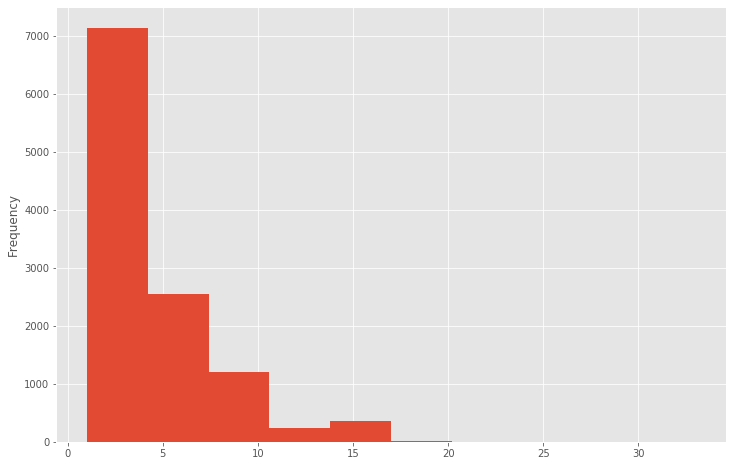

In [51]:
df.accommodates.plot(kind='hist')

Most of the data falls between 0-10 people.

**bathrooms**

In [52]:
col_info('bathrooms')

Column Name
bathrooms

Data Type: float64
Number of Unique Values: 21
Missing Data: 0.0%

Value Counts
1.0     6751
2.0     2258
2.5      775
1.5      762
3.0      402
3.5      183
4.0      139
4.5       73
5.0       47
0.0       31
6.0       21
5.5       21
0.5       14
NaN       14
6.5       14
8.0        5
7.0        4
7.5        2
17.0       1
9.0        1
11.0       1
9.5        1
Name: bathrooms, dtype: int64


In [53]:
df.bathrooms.dropna(inplace=True)

**bedrooms**

In [54]:
col_info('bedrooms')

Column Name
bedrooms

Data Type: float64
Number of Unique Values: 16
Missing Data: 0.0%

Value Counts
1.0     5459
2.0     2714
3.0     1586
0.0      697
4.0      679
5.0      228
6.0       86
7.0       30
8.0       16
9.0        9
10.0       6
NaN        5
15.0       1
12.0       1
14.0       1
13.0       1
23.0       1
Name: bedrooms, dtype: int64


In [55]:
df.bedrooms.dropna(inplace=True)

Dropped the 5 missing values.

**beds**

In [56]:
col_info('beds')

Column Name
beds

Data Type: float64
Number of Unique Values: 33
Missing Data: 0.0%

Value Counts
1.0      4404
2.0      2973
3.0      1796
4.0       818
5.0       437
6.0       288
0.0       168
7.0       156
8.0       105
10.0       76
9.0        68
11.0       59
NaN        40
12.0       36
13.0       18
14.0       16
16.0       14
15.0       11
18.0        7
17.0        6
19.0        5
22.0        4
25.0        2
26.0        2
24.0        2
39.0        1
28.0        1
20.0        1
33.0        1
132.0       1
27.0        1
36.0        1
61.0        1
30.0        1
Name: beds, dtype: int64


In [57]:
df.beds.fillna(df.beds.median(), inplace=True)

In [58]:
col_info('beds')

Column Name
beds

Data Type: float64
Number of Unique Values: 33
Missing Data: 0.0%

Value Counts
1.0      4404
2.0      3013
3.0      1796
4.0       818
5.0       437
6.0       288
0.0       168
7.0       156
8.0       105
10.0       76
9.0        68
11.0       59
12.0       36
13.0       18
14.0       16
16.0       14
15.0       11
18.0        7
17.0        6
19.0        5
22.0        4
24.0        2
26.0        2
25.0        2
39.0        1
28.0        1
33.0        1
132.0       1
27.0        1
36.0        1
30.0        1
61.0        1
20.0        1
Name: beds, dtype: int64


Since there were 40 missing data points, I decided to fill them with the column median rather than dropping them. I also noticed that there is one entry with 132 beds. This columns may need further inspection.

**bed_type**

In [59]:
col_info('bed_type')

Column Name
bed_type

Data Type: object
Number of Unique Values: 5
Missing Data: 0.0%

Value Counts
Real Bed         11407
Futon               43
Airbed              41
Pull-out Sofa       18
Couch               11
Name: bed_type, dtype: int64


Almost 100% of entries have real bed as the bed type so this column is not very useful and will be dropped.

**amenities**

Amenities is a behemoth of a column. There is a bunch of key information buried in this column for each listing entry that will have a great impact on the price of the rental.

In [60]:
col_info('amenities')

Column Name
amenities

Data Type: object
Number of Unique Values: 10449
Missing Data: 0.0%

Value Counts
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        52
{TV,"Cable TV",Internet,Wifi,"Air conditioning",Pool,Kitchen,Gym,Elevator,Heating,"Family/kid friendly",Washer,Dryer,Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace",Microwave,"Coffee maker",Refriger

In [61]:
amenity_replace_dict = {'}':',', '{':'', '"':''}

# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)

for x, y in amenity_replace_dict.items():
    amenities_list_string = amenities_list_string.replace(x, y)
    
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set


{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air hockey table',
 'Alfresco bathtub',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balcony',
 'Bar',
 'Barbecue utensils',
 'Basketball court',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach',
 'Beach chairs',
 'Beach essentials',
 'Beach volleyball',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Bocce ball court',
 'Body soap',
 'Bread maker',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling fans',
 'Central air conditioning',
 'Changing table',
 'Charcoal barbeque',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'D

**price**

In [62]:
col_info('price')

Column Name
price

Data Type: object
Number of Unique Values: 690
Missing Data: 0.0%

Value Counts
$150.00      380
$100.00      335
$200.00      301
$250.00      263
$75.00       261
            ... 
$482.00        1
$533.00        1
$683.00        1
$2,639.00      1
$441.00        1
Name: price, Length: 690, dtype: int64


In [63]:
#converting strings representing price of listign to integers
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",","")
df.price = df.price.astype('int64')

In [64]:
# df.price.plot(kind='bar')

**security_deposit**

In [65]:
col_info('security_deposit')

Column Name
security_deposit

Data Type: object
Number of Unique Values: 104
Missing Data: 27.0%

Value Counts
$0.00        3323
NaN          3059
$500.00       885
$100.00       829
$200.00       825
             ... 
$289.00         1
$395.00         1
$1,499.00       1
$180.00         1
$895.00         1
Name: security_deposit, Length: 105, dtype: int64


In [66]:
#converting strings representing price of security deposit to integers
#replacing NaN with 0
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",","")
df.security_deposit = df.security_deposit.fillna(0)
df.security_deposit = df.security_deposit.astype('int64')

**cleaning_fee**

In [67]:
col_info('cleaning_fee')

Column Name
cleaning_fee

Data Type: object
Number of Unique Values: 265
Missing Data: 18.0%

Value Counts
NaN          2033
$100.00       823
$50.00        790
$0.00         602
$75.00        567
             ... 
$326.00         1
$218.00         1
$327.00         1
$344.00         1
$1,375.00       1
Name: cleaning_fee, Length: 266, dtype: int64


In [68]:
#converting strings to integers
#replacing NaN with 0
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",","")
df.cleaning_fee = df.cleaning_fee.fillna(0)
df.cleaning_fee = df.cleaning_fee.astype('int64')

**extra_people**

In [69]:
col_info('extra_people')

Column Name
extra_people

Data Type: object
Number of Unique Values: 73
Missing Data: 0.0%

Value Counts
$0.00      6861
$25.00      864
$10.00      674
$50.00      632
$20.00      552
           ... 
$37.00        1
$115.00       1
$110.00       1
$500.00       1
$32.00        1
Name: extra_people, Length: 73, dtype: int64


In [70]:
#converting strings to integers
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",","")
df.extra_people = df.extra_people.astype('int64')

**minimum_nights**

In [71]:
col_info('minimum_nights')

Column Name
minimum_nights

Data Type: int64
Number of Unique Values: 49
Missing Data: 0.0%

Value Counts
1      4343
2      4316
3      1263
30      634
4       264
5       173
7       101
29       72
31       58
28       43
99       30
6        28
60       28
14       26
90       21
10       15
21       14
180      13
20       11
25        7
100       5
8         5
45        4
360       4
15        4
9         4
150       4
365       3
32        3
27        3
350       3
18        1
40        1
120       1
168       1
38        1
76        1
26        1
140       1
186       1
93        1
19        1
43        1
75        1
83        1
500       1
300       1
175       1
183       1
Name: minimum_nights, dtype: int64


**maximum_nights**

In [72]:
col_info('maximum_nights')

Column Name
maximum_nights

Data Type: int64
Number of Unique Values: 145
Missing Data: 0.0%

Value Counts
1125    5829
30       621
365      591
14       545
7        518
        ... 
1122       1
650        1
290        1
66         1
451        1
Name: maximum_nights, Length: 145, dtype: int64


**calendar_updated**

In [73]:
col_info('calendar_updated')

Column Name
calendar_updated

Data Type: object
Number of Unique Values: 95
Missing Data: 0.0%

Value Counts
today            2055
a week ago        883
2 weeks ago       758
yesterday         566
3 weeks ago       468
                 ... 
69 months ago       1
93 months ago       1
84 months ago       1
79 months ago       1
70 months ago       1
Name: calendar_updated, Length: 95, dtype: int64


This columns is not very descriptive, and I believe it will not have a large impact on the the price point of the rental listing.

In [74]:
df.drop('calendar_updated', axis=1, inplace=True)

**availability_30**

In [75]:
col_info('availability_30')

Column Name
availability_30

Data Type: int64
Number of Unique Values: 31
Missing Data: 0.0%

Value Counts
0     4235
30     517
8      336
7      319
9      296
11     296
6      288
13     285
10     274
4      263
5      262
3      260
29     252
12     247
19     247
15     243
1      240
14     239
16     232
20     228
17     222
18     209
2      208
28     194
21     193
23     191
22     190
24     156
25     140
26     130
27     128
Name: availability_30, dtype: int64


**availability_60**

In [76]:
col_info('availability_60')

Column Name
availability_60

Data Type: int64
Number of Unique Values: 61
Missing Data: 0.0%

Value Counts
0     3718
60     467
59     222
33     171
18     170
      ... 
2       89
7       85
55      80
54      74
51      66
Name: availability_60, Length: 61, dtype: int64


**availability_90**

In [77]:
col_info('availability_90')


Column Name
availability_90

Data Type: int64
Number of Unique Values: 91
Missing Data: 0.0%

Value Counts
0     3522
90     452
89     219
88     153
59     138
      ... 
14      54
25      51
29      47
23      46
7       44
Name: availability_90, Length: 91, dtype: int64


**availability_365**

Column Name
availability_365

Data Type: int64
Number of Unique Values: 366
Missing Data: 0.0%

Value Counts
0      3204
365     287
364      94
90       76
89       73
       ... 
272       4
212       3
214       3
204       3
190       2
Name: availability_365, Length: 366, dtype: int64


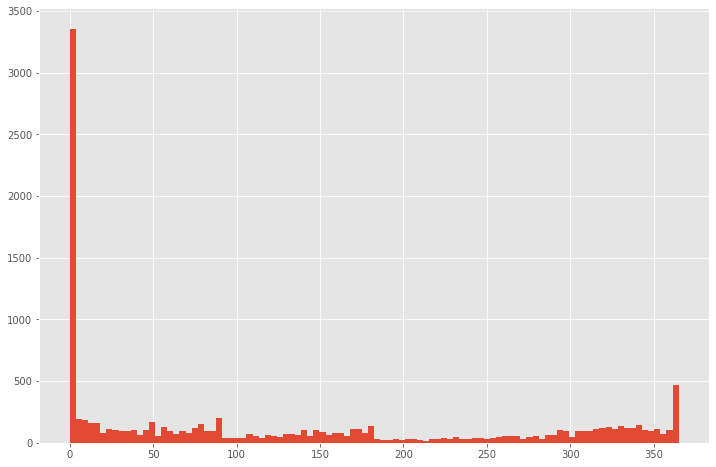

In [78]:
col_info('availability_365')
df.availability_365.hist(bins=100)

In [79]:
#keeping availability for 90 days out and dropping the rest
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

**number_of_reviews**

In [80]:
col_info('number_of_reviews')

Column Name
number_of_reviews

Data Type: int64
Number of Unique Values: 371
Missing Data: 0.0%

Value Counts
0      2467
1       990
2       679
3       501
4       375
       ... 
522       1
490       1
442       1
426       1
443       1
Name: number_of_reviews, Length: 371, dtype: int64


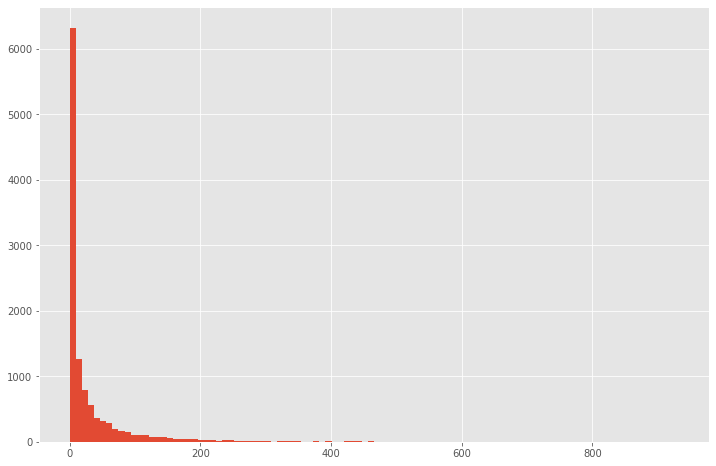

In [81]:
# total number of reviews 
df.number_of_reviews.hist(bins=100)

**number_of_reviews_ltm**

Column Name
number_of_reviews_ltm

Data Type: int64
Number of Unique Values: 142
Missing Data: 0.0%

Value Counts
0      4269
1       820
2       598
3       464
4       349
       ... 
394       1
386       1
122       1
137       1
631       1
Name: number_of_reviews_ltm, Length: 142, dtype: int64


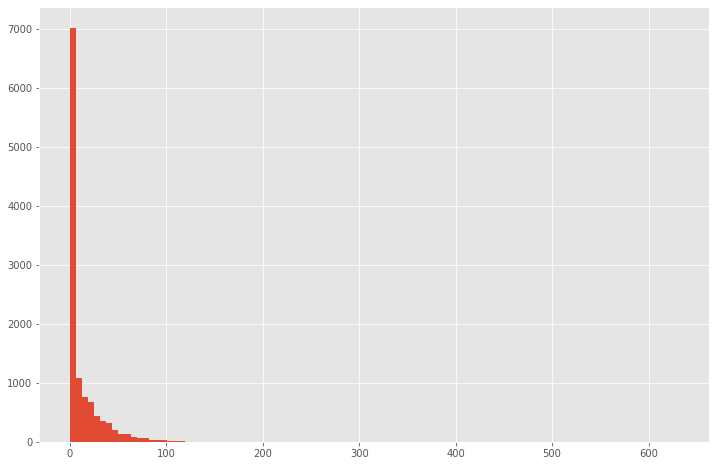

In [82]:
# number of reviews in the last 12 months
col_info('number_of_reviews_ltm')
df.number_of_reviews_ltm.hist(bins=100)

**first_review**

In [83]:
col_info('first_review')

Column Name
first_review

Data Type: object
Number of Unique Values: 1915
Missing Data: 21.0%

Value Counts
NaN           2467
2019-10-06      61
2018-03-11      60
2019-11-03      60
2019-03-10      59
              ... 
2015-07-03       1
2017-03-28       1
2014-12-16       1
2016-05-12       1
2018-06-13       1
Name: first_review, Length: 1916, dtype: int64


This shows that 21% of the listings haven't had their first review yet. This is a large poriton of the data, so I will keep the missing values as is for now.

In [84]:
#Creating a new column that shows the time in number of days since a listings first review
df.first_review = pd.to_datetime(df.first_review)
df['days_since_first_review'] = (dt(2020, 2, 19) - df.first_review)

In [85]:
col_info('days_since_first_review')

Column Name
days_since_first_review

Data Type: timedelta64[ns]
Number of Unique Values: 1915
Missing Data: 21.0%

Value Counts
NaT          2467
136 days       61
108 days       60
710 days       60
346 days       59
             ... 
1758 days       1
2750 days       1
1418 days       1
301 days        1
1209 days       1
Name: days_since_first_review, Length: 1916, dtype: int64


In [86]:
#Converting timedelta to 'Days'
df['days_since_first_review'] = df['days_since_first_review'].astype('timedelta64[D]')

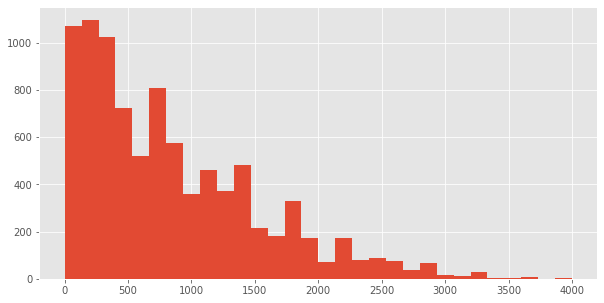

In [87]:
#Histogram showing distributions of the time since first review column
df.days_since_first_review.hist(figsize=(10,5), bins=30);

In [88]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [89]:
# Binning days since first review
bin_column('days_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.days_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

**last_review**

In [90]:
col_info('last_review')

Column Name
last_review

Data Type: object
Number of Unique Values: 1019
Missing Data: 21.0%

Value Counts
NaN           2467
2020-02-16     548
2020-02-09     422
2020-02-17     400
2020-02-02     342
              ... 
2016-10-30       1
2016-04-22       1
2017-10-10       1
2017-04-19       1
2017-12-18       1
Name: last_review, Length: 1020, dtype: int64


In [91]:
#Creating a new column that shows the time in number of days since a listings last review
df.last_review = pd.to_datetime(df.last_review)
df['days_since_last_review'] = (dt(2020, 2, 19) - df.last_review)

In [92]:
#Converting timedelta to 'Days'
df['days_since_last_review'] = df['days_since_last_review'].astype('timedelta64[D]')

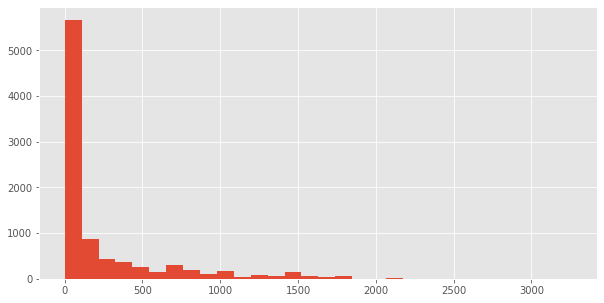

In [93]:
#Histogram showing distributions of the time since first review column
df.days_since_last_review.hist(figsize=(10,5), bins=30);

binning days since last review column

In [94]:
# Binning time since last review
bin_column('days_since_last_review',
           bins=[0, 182, 365, 730, 1460, max(df.days_since_last_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [95]:
#renaming days_since_first_reivew and days_since_last_reivew
df.rename(columns = {'days_since_first_review' : 'time_since_first_review',
                     'days_since_last_review' : 'time_since_last_review'}, inplace=True)

In [96]:
#checking newly binned cols
col_info('time_since_first_review')
col_info('time_since_last_review')

Column Name
time_since_first_review

Data Type: object
Number of Unique Values: 6
Missing Data: 0.0%

Value Counts
nan            2467
2-3 years      2452
1-2 years      2012
0-6 months     1636
4+ years       1593
6-12 months    1360
Name: time_since_first_review, dtype: int64
Column Name
time_since_last_review

Data Type: object
Number of Unique Values: 6
Missing Data: 0.0%

Value Counts
0-6 months     6373
nan            2467
6-12 months     878
2-3 years       801
1-2 years       780
4+ years        221
Name: time_since_last_review, dtype: int64


**review scores**

- Since there are several columns that depict a different variety of review scores, I will write a function to bin all of them.

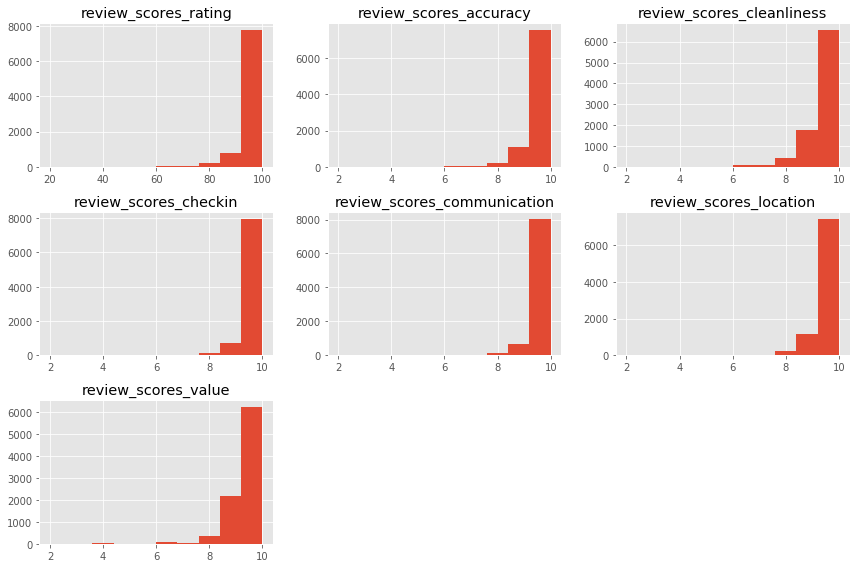

In [97]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [98]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [99]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8', '9', '10'],
               na_label='no reviews')

In [100]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79', '80-94', '95-100'],
           na_label='no reviews')

In [101]:
col_info('review_scores_rating')

Column Name
review_scores_rating

Data Type: object
Number of Unique Values: 4
Missing Data: 0.0%

Value Counts
95-100    6527
nan       2581
80-94     2031
0-79       381
Name: review_scores_rating, dtype: int64


In [102]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,days_as_host,room_tybpe,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2265,2008-08-23,within a few hours,100%,100%,1.0,2-3,1.0,78702,AUSTIN,HOUSE,ENTIRE HOME/APT,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",225,500,100,4,30,30,90,0,24,1,2009-03-17,2019-03-16,80-94,9,10,10,10,0-8,9,"{""Texas State""}",0,strict_14_with_grace_period,0,0,0.18,4197.0,ENTIRE HOME/APT,4+ years,6-12 months
5245,2008-08-23,within a few hours,100%,100%,1.0,2-3,1.0,78702,AUSTIN,HOUSE,PRIVATE ROOM,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100,500,75,2,35,30,60,0,9,0,2009-03-19,2018-03-14,80-94,10,0-8,10,9,10,9,"{""Texas State""}",0,strict_14_with_grace_period,0,0,0.07,4197.0,PRIVATE ROOM,4+ years,1-2 years
5456,2009-02-16,within a few hours,100%,98%,1.0,1,1.0,78702,AUSTIN,HOUSE,ENTIRE HOME/APT,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",95,100,0,2,45,2,90,54,522,51,2009-03-08,2020-01-29,95-100,10,10,10,10,10,10,"{""Texas State""}",0,strict_14_with_grace_period,0,1,3.91,4020.0,ENTIRE HOME/APT,4+ years,0-6 months
5769,2009-02-19,unknown,unknown,93%,1.0,1,1.0,78729,AUSTIN,HOUSE,PRIVATE ROOM,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",40,0,0,2,0,1,14,0,257,18,2010-04-10,2019-11-03,95-100,10,10,10,10,10,10,"{""Texas State""}",0,moderate,1,1,2.14,4017.0,PRIVATE ROOM,4+ years,0-6 months
6413,2009-04-17,within an hour,100%,100%,1.0,1,0.0,78704,AUSTIN,HOUSE,ENTIRE HOME/APT,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",99,0,50,2,25,4,365,18,109,23,2009-12-14,2020-02-02,95-100,10,10,10,10,10,10,"{""Texas State""}",0,strict_14_with_grace_period,0,0,0.88,3960.0,ENTIRE HOME/APT,4+ years,0-6 months


In [103]:
df.extra_people.unique()

array([ 30,  35,  45,   0,  25,   5,  10,  38, 100,  20,  50,  15,  75,
        28,   7,  70,  18, 150,  55, 125,  12,  95,  14,  65,  85,  90,
        40,  60, 500,  11, 300,  29,  89,  98,   8, 200,  80,  33,  34,
        61,  69, 129,  23,  36,  59,  49,  99, 115,  52,  58,   9, 120,
       180,  57,  22,  79,  19, 250,  39,  42,  17,  24,  26,  68,  27,
       110,  16,  13,  41,  56,  37,  32,   6], dtype=int64)

In [104]:
df.host_response_rate.unique()

array(['100%', 'unknown', '50-89%', '0-49%', '90-99%'], dtype=object)

In [105]:
df.host_acceptance_rate.unique()

array(['100%', '98%', '93%', '83%', '61%', '69%', '50%', nan, '91%',
       '94%', '43%', '85%', '96%', '84%', '77%', '33%', '78%', '90%',
       '99%', '97%', '67%', '82%', '79%', '0%', '95%', '92%', '46%',
       '89%', '57%', '80%', '52%', '86%', '17%', '68%', '76%', '88%',
       '75%', '87%', '66%', '62%', '30%', '63%', '35%', '58%', '73%',
       '71%', '70%', '81%', '25%', '36%', '60%', '64%', '74%', '20%',
       '44%', '54%', '32%', '41%', '40%', '14%', '55%', '27%', '48%',
       '42%', '29%', '56%', '22%', '59%', '49%', '38%', '72%', '13%',
       '51%', '24%', '45%', '65%', '37%', '9%', '47%', '53%', '15%',
       '39%', '6%', '21%', '19%', '26%'], dtype=object)

In [106]:
col_info('reviews_per_month')

Column Name
reviews_per_month

Data Type: float64
Number of Unique Values: 823
Missing Data: 21.0%

Value Counts
NaN      2467
0.02      198
0.04      197
0.08      162
0.03      133
         ... 
8.51        1
8.09        1
9.01        1
16.29       1
9.46        1
Name: reviews_per_month, Length: 824, dtype: int64


In [107]:
drop_cols = ['host_acceptance_rate', 'city', 'jurisdiction_names', 'require_guest_profile_picture',  ]

# EDA

1. Which areas/neighborhoods in Austin, TX are the most expensive and have the
most listings?
2. What are the most common listing types? (ie: entire home/apartment or shared
space?)
3. How long have different hosts been listing properties through Airbnb and how
many listings do host’s have on average?
4. How do Airbnb prices correlate with the number of people a listing
accommodates?
5. How favorable are reviews and what do the distributions look like?
6. What are the most common amenities, and which amenities are likely to increase
the price of a listing?
7. What is the value of being a superhost? Is it worth getting verified?

Question: how long have hosts been listing properties on Airbnb in Austin?

Question: are the different patterns in the growth in the number of hosts and the number of listings due to hosts increasingly owning multiple properties?

Question: what is the overall distribution of prices?

Question: how many listings do hosts have on average? How many multi-listing hosts are there?

Question: what are the average number of people accommodated, bathrooms, bedrooms and beds in Airbnb listings in London, and how do prices differ?

Question: which areas have the most Airbnb properties, and which are the most expensive?

Question: what are the most common property and room types?

Question: what is the distribution of reviews like?

Question: how long have listings been on the site, and how many listings have been reviewed recently?

Question: what proportion of Airbnb hosts are superhosts, and is it worth being one? (a question often asked by hosts)

Question: how many hosts are verified, and is it worth it? (a question often asked by hosts)

Question: how many properties are instant bookable (i.e. able to be booked without messaging the host first), and is it worth it?

Question: which amenities are common, and which increase the price of an Airbnb listing?

## Numerical Features
- Price
- Host Listings Count
- Number of people accomodated, bathrooms, bedrooms and beds

### Standardizing Data

In [472]:
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_binned']
num_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

In [473]:
df_num = df[num_cols]
df_num.describe()

,accommodates,bathrooms,bedrooms,beds
count,11520.000000,11506.000000,11515.000000,11520.000000
mean,4.705729,1.545498,1.786626,2.534896
std,3.239043,0.874151,1.270267,2.706366
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000
75%,6.000000,2.000000,2.000000,3.000000
max,33.000000,17.000000,23.000000,132.000000


In [474]:
df_num.isnull().values.any()

True

In [475]:
df_num = df_num.dropna(how='any',axis=0) 

In [476]:
df_num = df_num.reset_index(drop=True)

In [477]:
x = df_num.loc[:, num_features].values

In [478]:
y = df_num.loc[:,'price_binned'].values

In [479]:
x = StandardScaler().fit_transform(x)

In [480]:
pd.DataFrame(data = x, columns = num_features).head()

,accommodates,bathrooms,bedrooms,beds
0,-0.114400,0.841225,0.350518,-0.133368
1,-0.815171,-0.631515,-0.595649,-0.133368
2,-0.464785,-0.631515,-0.595649,-0.133368
3,-0.815171,-0.631515,-0.595649,-0.636710
4,-0.815171,-0.631515,-1.541817,-0.636710


### PCA Projection to 2D

In [481]:
pca = PCA(n_components=2)

In [482]:
principalComponents = pca.fit_transform(x)

In [483]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [484]:
principalDf.head()

,principal component 1,principal component 2
0,0.451203,-0.797123
1,-1.090996,0.220595
2,-0.909420,0.353007
3,-1.341895,-0.054378
4,-1.822638,0.202437


In [485]:
df_num[['price_binned']].head()

,price_binned
0,200-300
1,50-100
2,50-100
3,0-50
4,50-100


In [486]:
finalDf = pd.concat([principalDf, df_num[['price_binned']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,price_binned
0,0.451203,-0.797123,200-300
1,-1.090996,0.220595,50-100
2,-0.909420,0.353007,50-100
3,-1.341895,-0.054378,0-50
4,-1.822638,0.202437,50-100


### Visualize 2D Projection

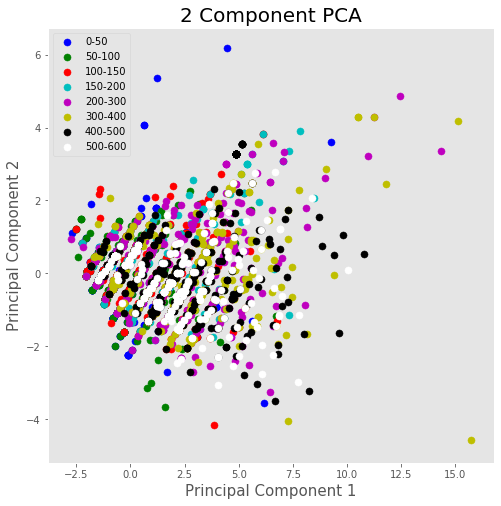

In [488]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['0-50','50-100','100-150','150-200',
           '200-300','300-400','400-500','500-600']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price_binned'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Price**

In [470]:
bins = [0,50,100,150,200,300,400,500,600]

In [471]:
df.price_binned = pd.cut(df.price, bins=bins,
                         labels = ['0-50','50-100','100-150','150-200',
                                   '200-300','300-400','400-500','500-600'])

(array([1152., 2757., 1909., 1283.,  759.,  606.,  760.,  525.,  632.,
         474.]),
 array([   0,   50,  100,  150,  200,  250,  300,  400,  500,  750, 1000]),
 <a list of 10 Patch objects>)

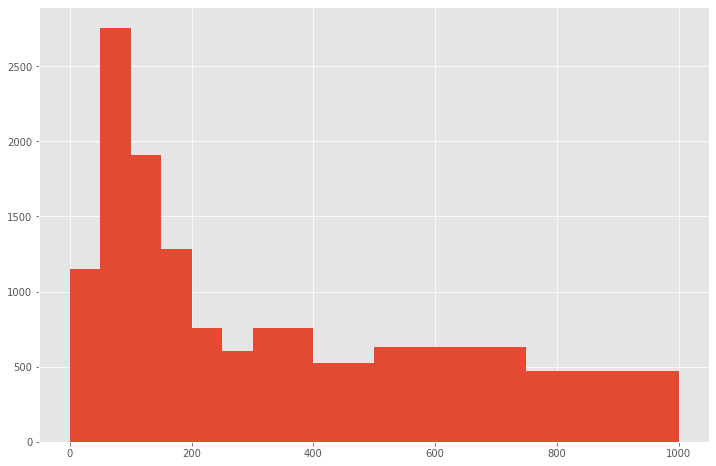

In [195]:
plt.hist(df.price, bins=bins)

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,days_as_host
count,11518.000000,11518.000000,11520.000000,11520.000000,11506.000000,11515.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,1.152000e+04,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,9053.000000,11518.000000
mean,0.334694,0.474214,78722.211545,4.705729,1.545498,1.786626,2.534896,489.851042,209.730903,70.584115,2.419705,12.797396,5.313715,1.870346e+05,36.017882,31.206944,12.353125,0.516840,0.023785,0.035417,1.691322,1710.882532
std,0.471904,0.499356,20.678762,3.239043,0.874151,1.270267,2.706366,1522.899704,481.925842,83.852351,2.723342,26.143313,17.243622,2.000799e+07,32.430907,62.014488,22.369397,0.499738,0.152384,0.184839,2.092030,851.298187
min,0.000000,0.000000,78701.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.000000,0.000000,78704.000000,2.000000,1.000000,1.000000,1.000000,80.000000,0.000000,10.000000,1.000000,0.000000,1.000000,2.900000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.260000,1102.000000
50%,0.000000,0.000000,78717.000000,4.000000,1.000000,1.000000,2.000000,149.000000,0.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,35.000000,7.000000,3.000000,1.000000,0.000000,0.000000,0.960000,1678.000000
75%,1.000000,1.000000,78744.000000,6.000000,2.000000,2.000000,3.000000,300.000000,250.000000,100.000000,2.000000,20.000000,2.000000,1.125000e+03,65.000000,32.000000,17.000000,1.000000,0.000000,0.000000,2.460000,2360.000000
max,1.000000,1.000000,78759.000000,33.000000,17.000000,23.000000,132.000000,25000.000000,5100.000000,1375.000000,36.000000,500.000000,500.000000,2.147484e+09,90.000000,932.000000,631.000000,1.000000,1.000000,1.000000,41.040000,4370.000000


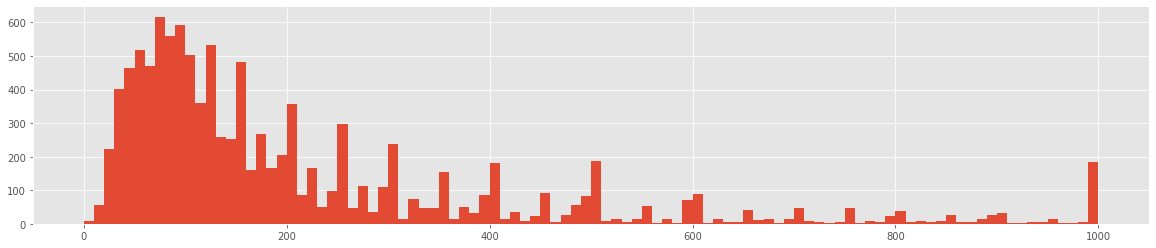

In [203]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))